# Principal Component Analysis (PCA)


Técnica de redução de dimensões lineares a fim de extrair inormações de um conjunto de dados. É um método estatístico NÃO SUPERVISIONADO que usa uma transformação ortogonal para converter um conjunto de observações de variáveis ​​possivelmente correlacionadas (entidades cada uma das quais assume vários valores numéricos) em um conjunto de valores de variáveis ​​linearmente não correlacionadas chamadas de componentes principais.



*   componentes principais:
Transformações lineares dos parâmetros iniciais do modelo, de forma que a maior variância fique no primeiro eixo e assim sucessivamente, o que permite que reduzir o número de variáveis conforme a variância do sistema, descartando as variáveis com menor influência. 







Fonte: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline      
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


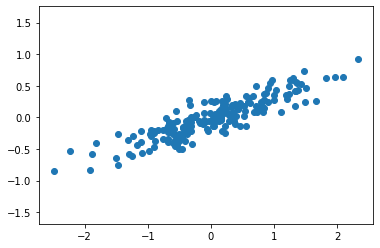

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

#em vez de tentar prever os valores de y a partir dos valores de x, 
#o problema de aprendizado não supervisionado tenta aprender sobre a relação entre os valores x e y.

#Na análise de componentes principais, esse relacionamento é quantificado 
#encontrando uma lista dos eixos principais nos dados e usando esses eixos para descrever o conjunto de dados.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [5]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


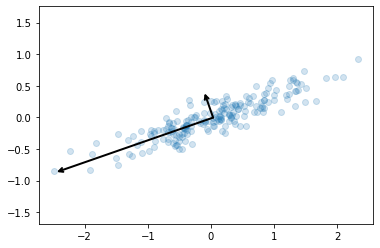

In [6]:
#Para ver o que esses números significam, vamos visualizá-los como vetores sobre os dados de entrada,
# usando os "componentes" para definir a direção do vetor e a "variância explicada"

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');




In [ ]:
#INTERPRETAÇÃO 
#-------------------------------------------------------------------
#VETORES: eixos principais dos dados
# 
# COMPRIMENTO: indica a importância da variável na dscrição da distribuição 
# dos dados ( medida da variância dos dados quando projetados nesse eixo)
#
#PROJEÇÃO: componentes principais dos dados
#-------------------------------------------------------------------

# PCA para redução de Dimensão

Zerar um ou mais dos menores componentes principais, resultando em uma projeção de dimensão inferior dos dados que preserva a variância máxima dos dados.


In [9]:
from sklearn.datasets import load_digits #carrega um conjunto de dados

digits = load_digits()
digits.data.shape #o dado possui 64 dimensões

(1797, 64)

In [10]:
#Aplicando o PCA para projetá-los em um numero menor de dimensões (neste caso 2D)

pca = PCA(2)  
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape) #RESULTADO FINAL


(1797, 64)
(1797, 2)


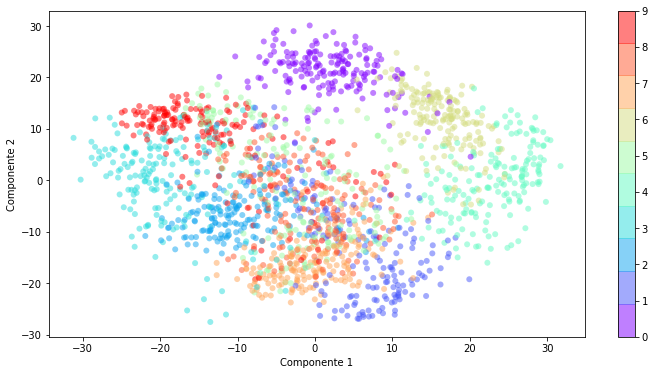

In [23]:
fig = plt.figure(figsize=(12,6))

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();

# os dados completos são uma nuvem de pontos de 64 dimensões e esses pontos são a projeção de cada ponto de dados
# ao longo das direções com a maior variação. 
